In [18]:
from scipy.spatial.distance import cosine as cs
import numpy as np

In [123]:
def batch_cosine(A,B):
    assert A.shape[1] ==  B.shape[1]

    A_norm = np.linalg.norm(A,axis = 1, ord = 2).reshape(-1,1)
    B_norm = np.linalg.norm(B, axis = 1, ord = 2).reshape(1,-1)

    assert np.all(A_norm!=0)
    assert np.all(B_norm!=0)

    dotter = np.dot(A, B.T)
    return dotter / np.dot(A_norm, B_norm)

def partition(A):
    n_partitions = 6
    partition_size = A.shape[0] // n_partitions
    n_partitions += int(A.shape[0] % n_partitions > 0)

    for i in range(n_partitions):

        if i == n_partitions-1:
            yield A[i*parition_size:A.shape[0],:]
        else:
            yield A[i*partition_size:(i+1)*partition_size,:]

In [179]:
A = np.random.random(size = (8000,40000))

In [180]:
# result = []
# for batch in partition(A):
#     result.append(batch_cosine(batch,A))
    
# result = np.concatenate(result, axis = 0)

In [181]:
from multiprocessing import Pool

def linkage_(A):
    p = Pool(7)
    result = []
    for batch in partition(A):
        r = p.apply_async(batch_cosine, args=(batch,A))
        result.append(r)
    p.close()
    p.join()
    result = [r.get() for r in result]
    result = np.concatenate(result, axis = 0)
    return result

In [ ]:
%time linkage_(A)

In [153]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline


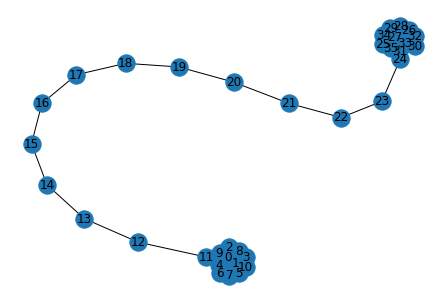

In [154]:
G = nx.barbell_graph(12,12)
nx.draw(G, with_labels = True)

In [157]:
A = nx.adj_matrix(G).toarray()

In [158]:
result = []
for batch in partition(A):
    result.append(batch_cosine(batch,A))
    
result = np.concatenate(result, axis = 0)

In [161]:
import seaborn as sns

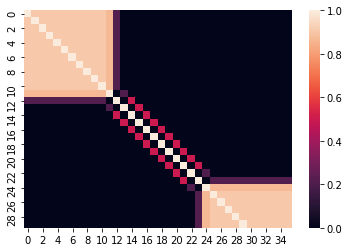

In [167]:
sns.heatmap(result)

In [1]:
import networkx as nx

In [5]:
G = nx.barbell_graph(10000,10000)

In [6]:
len(G.nodes())

30000